In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Qin Cirrhosis

## Refseq OTU

In [2]:
task = 'Qin Cirrhosis Healthy/Cirrhosis Refseq OTU'
folder = 'qin_cirrhosisv2'

In [3]:
num_features = 588
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/qin_cirrhosis_refseq_exp1/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/qin_cirrhosis_refseq_exp2/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/qin_cirrhosis_refseq_exp3/best_test.csv', sep=';') # NoRel+CLR

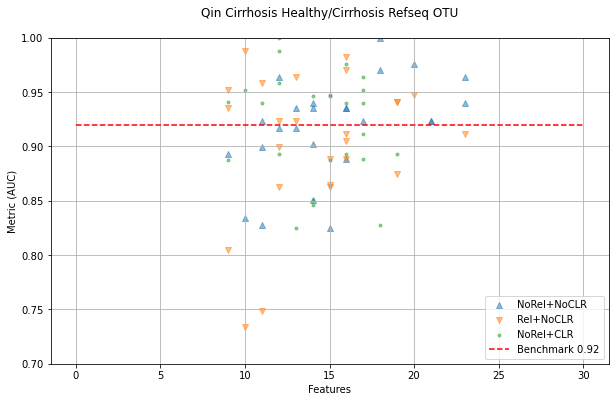

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.92, filename='./plotsv2/qin_cirrhosis_refseq_otu.png', xmax=30, ylim=(0.7, 1))

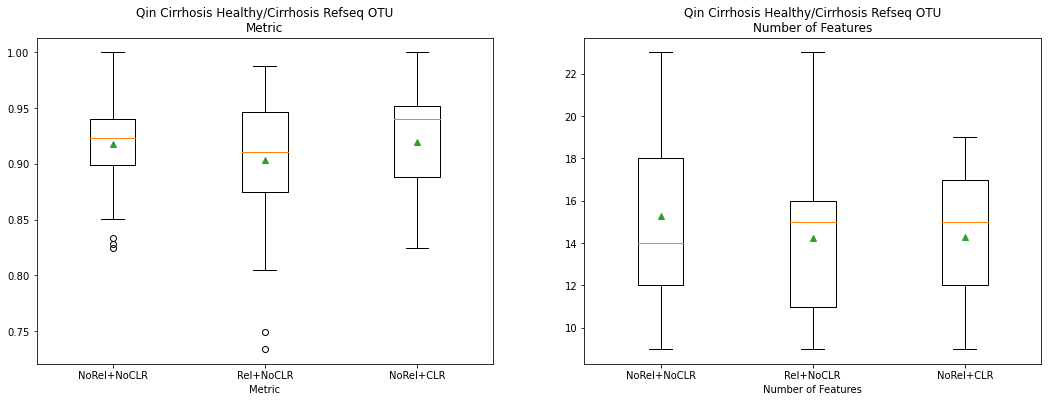

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plotsv2/qin_cirrhosis_boxplot_refseq_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (130, 8485)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (130, 8485)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (130, 8485)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
19,16,12,0.964,0.963,"[792, 1656, 1659, 1660, 3563, 3612, 4495, 4707...",0.944,0.944,"[0.976, 0.982, 1.0, 0.95, 0.914, 0.89, 0.982, ...",0.946,0.814,1.0,0.039
24,18,16,0.935,0.933,"[682, 714, 716, 870, 1248, 1669, 1672, 1986, 3...",0.908,0.908,"[0.982, 1.0, 0.956, 0.923, 0.964, 1.0, 0.911, ...",0.940,0.762,1.0,0.043
14,12,11,0.899,0.898,"[222, 480, 1557, 1658, 1780, 3650, 5475, 7158,...",0.880,0.880,"[0.979, 0.946, 0.885, 0.867, 0.923, 0.964, 0.9...",0.937,0.814,1.0,0.046
1,1,14,0.935,0.933,"[632, 1594, 1672, 1961, 2000, 2166, 3177, 3348...",0.911,0.911,"[0.964, 0.944, 0.935, 0.932, 0.982, 0.976, 0.9...",0.936,0.717,1.0,0.050
16,13,12,0.917,0.916,"[1347, 1465, 1701, 1804, 2264, 2737, 3672, 404...",0.897,0.897,"[0.953, 0.94, 0.905, 0.923, 1.0, 0.976, 0.953,...",0.935,0.757,1.0,0.054


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
23,17,11,0.958,0.957,"[71, 302, 1340, 1578, 1676, 1691, 3563, 7131, ...",0.939,0.939,"[0.923, 0.988, 0.976, 1.0, 0.953, 1.0, 1.0, 0....",0.958,0.828,1.0,0.041
1,1,10,0.988,0.987,"[668, 728, 908, 1679, 3563, 3672, 5599, 6563, ...",0.971,0.971,"[0.988, 0.908, 0.94, 0.929, 0.935, 0.941, 0.96...",0.949,0.858,1.0,0.034
12,10,12,0.923,0.922,"[1187, 1671, 2203, 2287, 3494, 3666, 4048, 450...",0.903,0.903,"[0.959, 1.0, 0.914, 0.839, 0.946, 0.923, 0.911...",0.947,0.827,1.0,0.041
9,8,13,0.923,0.921,"[222, 684, 1679, 1688, 2265, 3650, 4978, 5542,...",0.901,0.901,"[0.923, 0.926, 0.929, 0.935, 0.952, 0.846, 0.8...",0.938,0.825,1.0,0.040
24,18,9,0.805,0.804,"[863, 1804, 2100, 3563, 5997, 6494, 7798, 7829...",0.790,0.790,"[1.0, 0.994, 0.845, 0.875, 0.891, 0.929, 0.964...",0.938,0.768,1.0,0.043


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
33,23,9,0.941,0.940,"[257, 1668, 1675, 1743, 1916, 3608, 3672, 5353...",0.926,0.926,"[0.887, 0.982, 0.964, 0.923, 0.935, 0.875, 1.0...",0.937,0.825,1.0,0.047
29,20,17,0.964,0.962,"[870, 901, 1186, 2383, 2684, 3555, 3672, 3812,...",0.935,0.935,"[0.935, 0.917, 0.988, 0.982, 0.941, 0.967, 0.9...",0.934,0.751,1.0,0.045
24,17,12,0.958,0.957,"[867, 1661, 2184, 2285, 2796, 3296, 3672, 3898...",0.938,0.938,"[0.902, 0.982, 0.908, 0.988, 0.908, 0.926, 0.9...",0.932,0.774,1.0,0.048
27,18,14,0.946,0.944,"[437, 1499, 1555, 1671, 1751, 3296, 3563, 3591...",0.922,0.922,"[0.923, 0.866, 0.932, 0.955, 0.938, 0.891, 0.8...",0.930,0.807,1.0,0.045
3,1,9,0.887,0.886,"[78, 1336, 1655, 2092, 2737, 3581, 3665, 5551,...",0.872,0.872,"[1.0, 0.857, 0.899, 0.864, 0.97, 0.876, 0.849,...",0.930,0.787,1.0,0.051


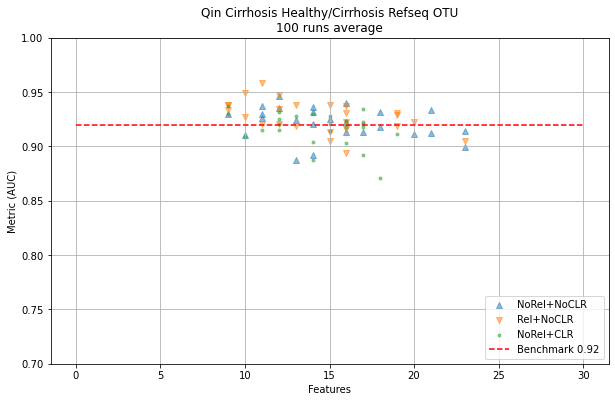

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.92, filename='./plotsv2/qin_cirrhosis_refseq_otu_avg_n.png', xmax=30, ylim=(0.7, 1))

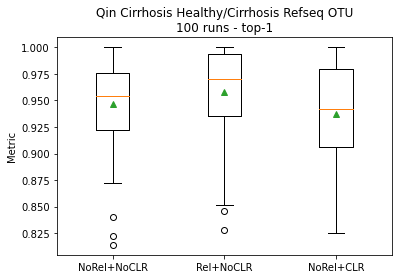

In [17]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plotsv2/qin_cirrhosis_boxplot_nruns_top1_refseq_otu.png')

---

In [9]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [10]:
folder = 'qin_cirrhosisv2'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

best_n_features = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [12]:
config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    score, fi = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    score, fi = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['Rel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    score, fi = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+CLR'].append(len(top_n_features))

Final dataset shape: (130, 8485)
Final dataset shape: (130, 8485)
Final dataset shape: (130, 8485)


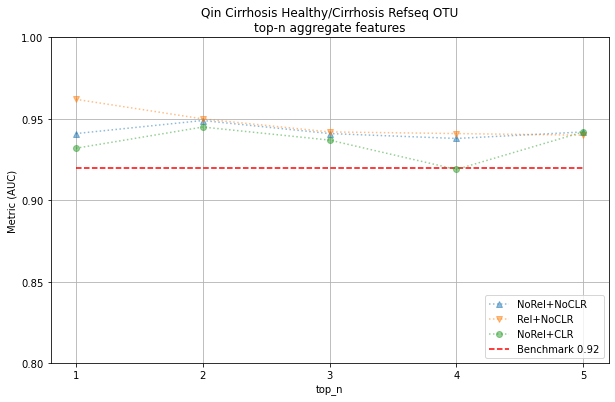

In [25]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.92, filename='./plotsv2/qin_cirrhosis_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.8, 1.0001), top_n=top_n)

In [13]:
print(best_n)
print(best_n_features)

{'NoRel+NoCLR': [0.941, 0.949, 0.941, 0.938, 0.942], 'Rel+NoCLR': [0.962, 0.95, 0.942, 0.941, 0.94], 'NoRel+CLR': [0.932, 0.945, 0.937, 0.919, 0.942]}
{'NoRel+NoCLR': [12, 28, 39, 51, 61], 'Rel+NoCLR': [11, 20, 32, 44, 51], 'NoRel+CLR': [9, 25, 36, 48, 57]}


---

In [14]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [15]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
score, fi = run_best_features.run(config, data1, top_n_features, 20, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0105       NZ_KI271096.1 Eubacterium ramulus ATCC 29099 genomic scaffold Scaffold1335, whole genome shotgun sequence
          -            0.011        NZ_JH379414.1 Prevotella stercorea DSM 18206 genomic scaffold Scfld511, whole genome shotgun sequence
          -            0.012        NZ_GG730316.1 Clostridium sp. M62/1 genomic scaffold Scfld7, whole genome shotgun sequence
          -            0.013        NZ_KB290687.1 Anaerostipes hadrus DSM 3319 genomic scaffold Scfld310, whole genome shotgun sequence
          -            0.0133       NZ_GG692780.1 Roseburia intestinalis L1-82 genomic scaffold Scfld67, whole genome shotgun sequence
          -            0.0192       NZ_KB290652.1 Anaerostipes hadrus DSM 3319 genomic scaffold Scfld72, whole genome shotgun sequence
          -            0.0205       NC_017861.1 Prevotella intermedia 17 chromosome II, complete sequence
          -            0.0239       

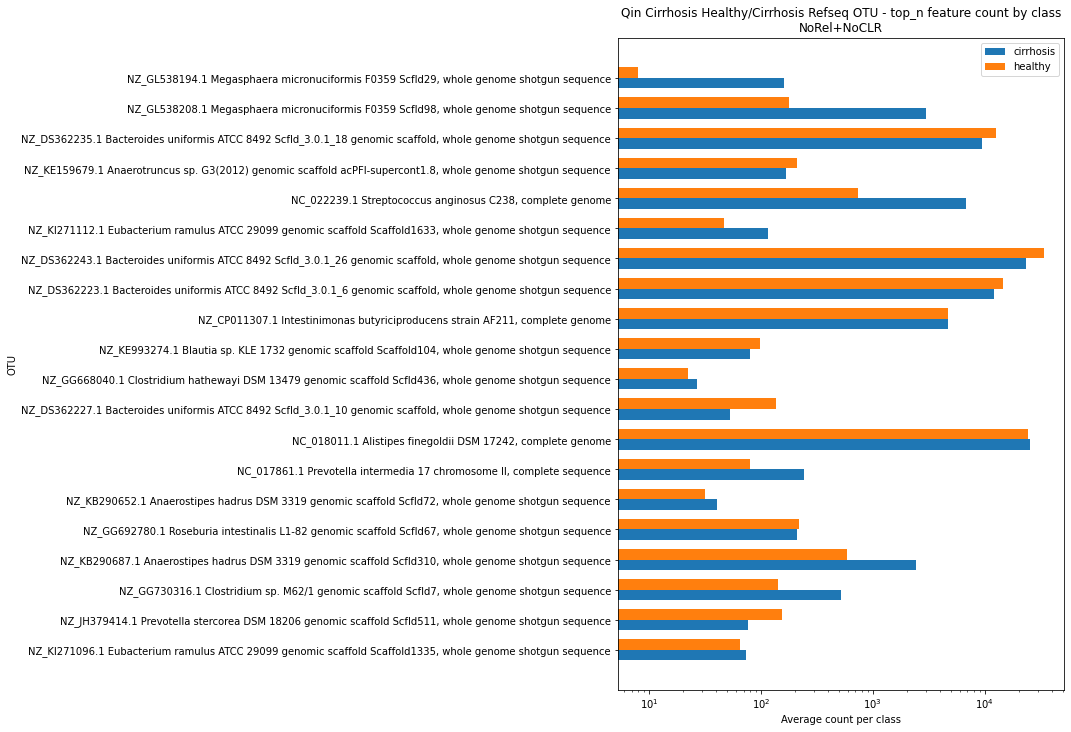

In [16]:
features = data1.features[top_n_features]
filename = f'./plotsv2/qin_cirrhosis_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data1, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('cirrhosis', 'healthy'), figsize=(8,12), filename=filename, clean_otu=True)

In [17]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data2, top_n_features, 20, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.022        NZ_CP012072.1 Actinomyces meyeri strain W712, complete genome
          -            0.0229       NZ_KE992775.1 Clostridium sp. KLE 1755 genomic scaffold Scaffold917, whole genome shotgun sequence
          -            0.0234       NZ_KI535369.1 Catonella morbi ATCC 51271 genomic scaffold Scfld3, whole genome shotgun sequence
          -            0.0318       NZ_DS264325.1 Ruminococcus obeum ATCC 29174 Scfld0236 genomic scaffold, whole genome shotgun sequence
          -            0.037        NZ_KI271772.1 Oscillibacter sp. KLE 1745 genomic scaffold Scaffold61, whole genome shotgun sequence
          -            0.0443       NC_009615.1 Parabacteroides distasonis ATCC 8503, complete genome
          -            0.0796       NZ_DS362240.1 Bacteroides uniformis ATCC 8492 Scfld_3.0.1_23 genomic scaffold, whole genome shotgun sequence
          -            0.1043       NZ_DS480317.1 Clostridium sp. L2-

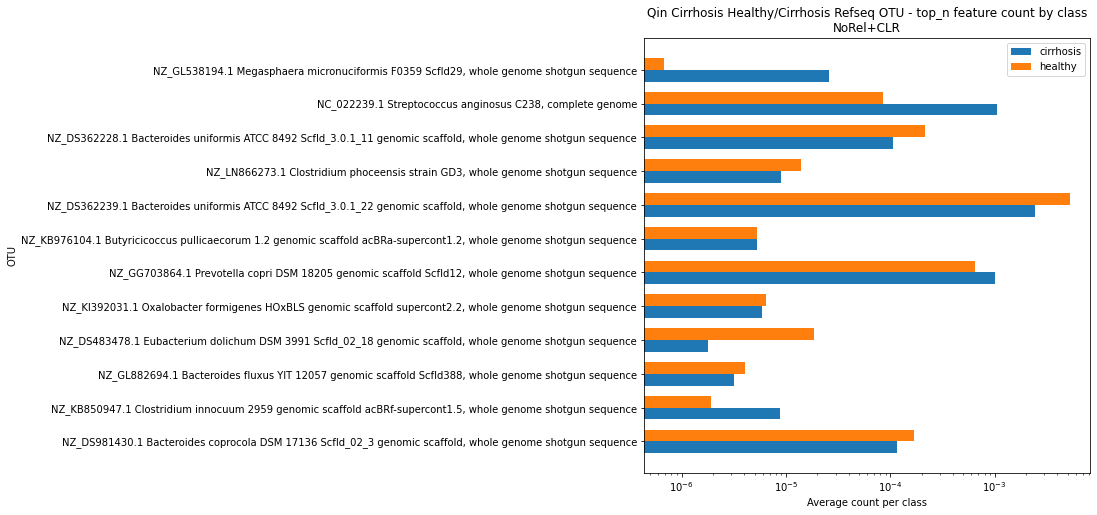

In [21]:
features = data2.features[top_n_features]
filename = f'./plotsv2/qin_cirrhosis_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data2, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('cirrhosis', 'healthy'), figsize=(8,8), filename=filename, clean_otu=True)

In [19]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.016        NZ_DS981430.1 Bacteroides coprocola DSM 17136 Scfld_02_3 genomic scaffold, whole genome shotgun sequence
          -            0.0183       NZ_KB850947.1 Clostridium innocuum 2959 genomic scaffold acBRf-supercont1.5, whole genome shotgun sequence
          -            0.0185       NZ_GL882694.1 Bacteroides fluxus YIT 12057 genomic scaffold Scfld388, whole genome shotgun sequence
          -            0.0203       NZ_DS483478.1 Eubacterium dolichum DSM 3991 Scfld_02_18 genomic scaffold, whole genome shotgun sequence
          -            0.0256       NZ_KI392031.1 Oxalobacter formigenes HOxBLS genomic scaffold supercont2.2, whole genome shotgun sequence
          -            0.0289       NZ_GG703864.1 Prevotella copri DSM 18205 genomic scaffold Scfld12, whole genome shotgun sequence
          -            0.036        NZ_KB976104.1 Butyricicoccus pullicaecorum 1.2 genomic scaffold acBRa-supercont1.2, w

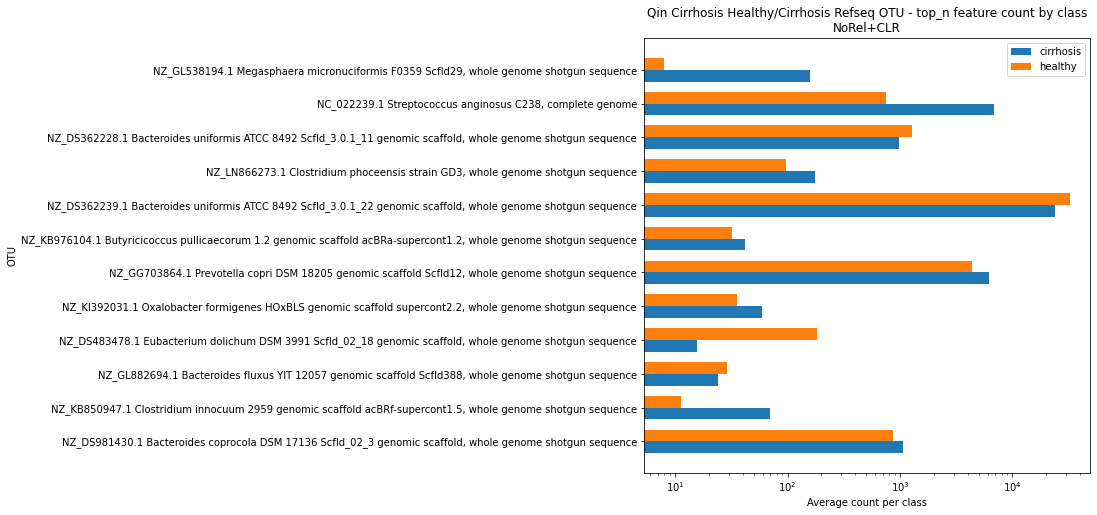

In [24]:
features = data3.features[top_n_features]
filename = f'./plotsv2/qin_cirrhosis_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data3, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('cirrhosis', 'healthy'), figsize=(8,8), filename=filename, clean_otu=True)